In [1]:
import random

import heavy_tails as hevytail
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import real_data_loader
import torch
import train_garch

## Set seeds for reconstruction of the results

In [2]:
# Set seeds.
SEED = 12345
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

#### Load Data

Filter out selected times and stocks

In [3]:
real_loader = real_data_loader.RealDataLoader(cache="../data/cache")
real_data = real_loader.get_timeseries(
    col_name="Adj Close", data_path="../data/raw_yahoo_data", update_all=False
)

Cached data found at ../data/cache/time_series_Adj_Close.csv.


Inspect data for missing information

In [4]:
N_STOCKS = 9216
nan_mask = ~np.isnan(real_data)  # returns pd.dataframe
num_non_nans: pd.DataFrame = np.sum(nan_mask, axis=0)
non_nan_orderd_stocks: pd.DataFrame = num_non_nans.sort_values(ascending=False)
# plt.plot(non_nan_orderd_stocks.values)
stocks = non_nan_orderd_stocks.iloc[non_nan_orderd_stocks.values >= N_STOCKS].index

In [5]:
# stocks = ["MSFT", "AAPL", "IBM", "ADBE", "ORCL", "INTC", "AMD", "HPQ"]
# stocks = ['MSFT']
first_date = real_data.index[-N_STOCKS]
real_data = real_data.loc[first_date:, stocks]
real_data = real_data.loc[:, np.all(~np.isnan(real_data), axis=0)]
assert np.all(~np.isnan(real_data))
print(f"Shape: {real_data.shape}")
print(f"Frist Date {real_data.index[0]:%Y-%m-%d}")
print(f"Last Date {real_data.index[-1]:%Y-%m-%d}")

Shape: (9216, 233)
Frist Date 1987-08-05
Last Date 2024-03-01


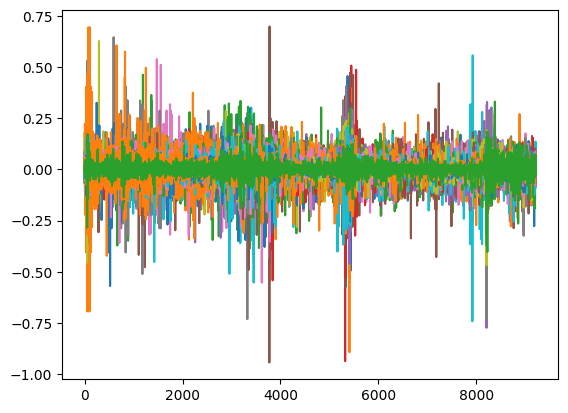

In [6]:
np_data = np.array(real_data)
np_ret = np.log(np_data[1:] / np_data[:-1])
np_ret[np.abs(np_ret) >= 2] = 0  # clean data
np_log_price = np.cumsum(np_ret, axis=0)
plt.plot(np_ret)
plt.show()

## Real Data

Real data heavy tails pos_corr 0.9766161553323784
Real data heavy tails neg_corr 0.9733939618259404
Real data heavy tails pos_rate -3.5248665022285697
Real data heavy tails neg_rate -3.214216760974221
Real data heavy tails pos_rate_std 0.2160936025450152
Real data heavy tails neg_rate_std 0.24331391577930742


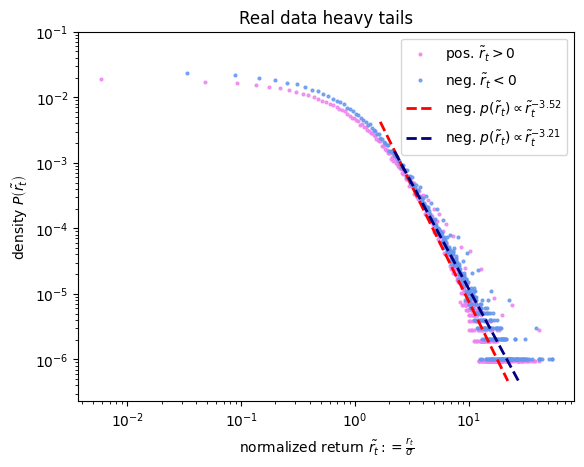

In [7]:
stats = ["pos_corr", "neg_corr", "pos_rate", "neg_rate", "pos_rate_std", "neg_rate_std"]
hevytail.visualize_stat(plt.gca(), np_ret, "Real data", stats)
# plt.savefig("/home/nico/edu/masterthesis/presentations/week16/figures/ht.png")
plt.show()

## Garch Normal, p=3, q=3

In [8]:
cache = "../data/cache/Garch_normal_3_3_2024_06_26-11_11_24"
garch_log_returns = train_garch.sample_garch(cache)

# Drop bad fits
garch_log_returns = garch_log_returns[
    :, np.sum(np.isnan(garch_log_returns), axis=0) == 0
]

/home/nico/edu/masterthesis/code/src/garch/train_garch.py:133: RuntimeWarning: invalid value encountered in log
  log_returns.append(np.log(return_simulation))


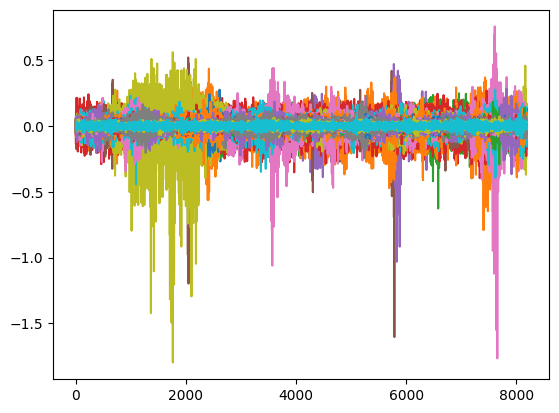

In [9]:
plt.plot(garch_log_returns)
plt.show()
plt.close()

GARCH Normal 3 3 heavy tails pos_corr 0.9810610693685644
GARCH Normal 3 3 heavy tails neg_corr 0.9669084734278578
GARCH Normal 3 3 heavy tails pos_rate -3.2965013484454446
GARCH Normal 3 3 heavy tails neg_rate -2.8289401848843636
GARCH Normal 3 3 heavy tails pos_rate_std 0.11319319452954667
GARCH Normal 3 3 heavy tails neg_rate_std 0.14694926801258532


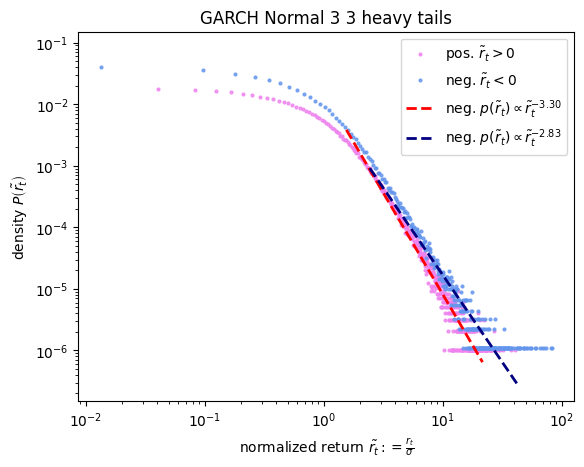

In [10]:
stats = ["pos_corr", "neg_corr", "pos_rate", "neg_rate", "pos_rate_std", "neg_rate_std"]
hevytail.visualize_stat(plt.gca(), garch_log_returns, "GARCH Normal 3 3", stats)
# plt.savefig("/home/nico/edu/masterthesis/presentations/week16/figures/ht.png")
plt.show()